# LangGraph RAG Eval with RAGAS: Naive vs Semantic chunking

Lets setup API Keys:

In [2]:
import os
from getpass import getpass
os.environ["OPENAI_API_KEY"] = getpass("Please enter your OpenAI API key!")

Dataset generation using RAGAS

In [3]:
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
from ragas.testset import TestsetGenerator
import copy
from langchain_community.document_loaders import DirectoryLoader
from langchain_community.document_loaders import PyMuPDFLoader

path = "data/"
loader = DirectoryLoader(path, glob="*.pdf", loader_cls=PyMuPDFLoader) 
docs = loader.load()

generator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4.1"))
generator_embeddings = LangchainEmbeddingsWrapper(OpenAIEmbeddings())

generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings)

# NOTE: docs[:20] is used to limit the number of documents to 20 for testing purposes.
# To run the full dataset, replace docs[:20] with docs. Also adjust your testset_size to the number you want to use.
dataset = generator.generate_with_langchain_docs(docs[:20], testset_size=20)

dataset.to_pandas()



Applying HeadlinesExtractor:   0%|          | 0/17 [00:00<?, ?it/s]

Applying HeadlineSplitter:   0%|          | 0/20 [00:00<?, ?it/s]

unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node


Applying SummaryExtractor:   0%|          | 0/29 [00:00<?, ?it/s]

Property 'summary' already exists in node '4cd842'. Skipping!
Property 'summary' already exists in node '1aad7f'. Skipping!
Property 'summary' already exists in node '6e2fa8'. Skipping!
Property 'summary' already exists in node 'ed4aa8'. Skipping!
Property 'summary' already exists in node '65f285'. Skipping!
Property 'summary' already exists in node '36ea7b'. Skipping!
Property 'summary' already exists in node '7d217f'. Skipping!
Property 'summary' already exists in node '80179c'. Skipping!
Property 'summary' already exists in node '3550d8'. Skipping!
Property 'summary' already exists in node 'db5952'. Skipping!
Property 'summary' already exists in node '5d64dd'. Skipping!
Property 'summary' already exists in node 'ee8c06'. Skipping!


Applying CustomNodeFilter:   0%|          | 0/10 [00:00<?, ?it/s]

Applying [EmbeddingExtractor, ThemesExtractor, NERExtractor]:   0%|          | 0/43 [00:00<?, ?it/s]

Property 'summary_embedding' already exists in node '1aad7f'. Skipping!
Property 'summary_embedding' already exists in node '3550d8'. Skipping!
Property 'summary_embedding' already exists in node '36ea7b'. Skipping!
Property 'summary_embedding' already exists in node 'ed4aa8'. Skipping!
Property 'summary_embedding' already exists in node '65f285'. Skipping!
Property 'summary_embedding' already exists in node 'db5952'. Skipping!
Property 'summary_embedding' already exists in node '80179c'. Skipping!
Property 'summary_embedding' already exists in node '4cd842'. Skipping!
Property 'summary_embedding' already exists in node '6e2fa8'. Skipping!
Property 'summary_embedding' already exists in node '7d217f'. Skipping!
Property 'summary_embedding' already exists in node '5d64dd'. Skipping!
Property 'summary_embedding' already exists in node 'ee8c06'. Skipping!


Applying [CosineSimilarityBuilder, OverlapScoreBuilder]:   0%|          | 0/2 [00:00<?, ?it/s]

Generating personas:   0%|          | 0/3 [00:00<?, ?it/s]

Generating Scenarios:   0%|          | 0/3 [00:00<?, ?it/s]

Generating Samples:   0%|          | 0/21 [00:00<?, ?it/s]

,user_input,reference_contexts,reference,synthesizer_name
0,Can dependent undergraduate students whose par...,"[information, see the discussion under <Direct...",Dependent undergraduate students whose parents...,single_hop_specifc_query_synthesizer
1,Who all can fill out FAFSA for Direct PLUS Loa...,[Definition of <Parent= for Direct PLUS Loan P...,"For Direct PLUS Loan, the student’s biological...",single_hop_specifc_query_synthesizer
2,Wut is the purpse of the National Studnt Loan ...,[If your school participates in the Direct PLU...,The National Student Loan Data System (NSLDS) ...,single_hop_specifc_query_synthesizer
3,"According to DCL GEN-16-10, what are the requi...",[Direct Loan Eligibility After an Enrollment S...,DCL GEN-16-10 states that if a student who rec...,single_hop_specifc_query_synthesizer
4,What are the counseling requirements for stude...,[Chapter 2 Direct Loan Counseling Counseling O...,There is a special counseling requirement for ...,single_hop_specifc_query_synthesizer
5,Whaat is the requirment for first-time borrwer...,[Entrance Counseling Entrance counseling is re...,Entrance counseling is required for all first-...,single_hop_specifc_query_synthesizer
6,Wut infomation does the Departmant provide to ...,[provided by those companies are already offer...,The Department makes available a wide variety ...,single_hop_specifc_query_synthesizer
7,Who is eligible to borrow a Direct PLUS Loan o...,"[<1-hop>\n\ninformation, see the discussion un...",A Direct PLUS Loan on behalf of a dependent un...,multi_hop_abstract_query_synthesizer
8,"According to federal regulations, who is eligi...","[<1-hop>\n\ninformation, see the discussion un...",Direct PLUS Loans can be borrowed on behalf of...,multi_hop_abstract_query_synthesizer
9,"How does Direct Loan counseling, especially en...",[<1-hop>\n\nChapter 2 Direct Loan Counseling C...,"Direct Loan counseling, particularly entrance ...",multi_hop_abstract_query_synthesizer


In [4]:
# For pandas DataFrames naive chunking
dataset_copy_naive = copy.deepcopy(dataset)
# For pandas DataFrames semantic chunking
dataset_copy_semantic = copy.deepcopy(dataset)

LangGraph\LangChain RAG. Definition of vector stores:

In [5]:

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams
from langchain_community.document_loaders import DirectoryLoader
from langchain_community.document_loaders import PyMuPDFLoader
import os, glob
from semantic_chunk_tool import extract_and_chunk_paragraphs
from langchain_core.documents import Document

path = "data/"

# Naive Chunking:
loader = DirectoryLoader(path, glob="*.pdf", loader_cls=PyMuPDFLoader)
docs = loader.load()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
split_documents_naive = text_splitter.split_documents(docs)

# Semantic Chunking:
pdf_pattern = os.path.join(path, "*.pdf")
pdf_files = glob.glob(pdf_pattern)
    
if not pdf_files:
  print(f"No PDF files found in {path}")
    
split_documents_semantic =[]

for pdf_file in pdf_files:
    chunks = extract_and_chunk_paragraphs(pdf_file)
    split_documents_semantic.extend([Document(page_content=chunk) for chunk in chunks])

# define embeddings
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

# define qdrant client
client = QdrantClient(":memory:")

# define collections:
client.create_collection(
    collection_name="loan_data_naive",
    vectors_config=VectorParams(size=1536, distance=Distance.COSINE),
)
client.create_collection(
    collection_name="loan_data_semantic",
    vectors_config=VectorParams(size=1536, distance=Distance.COSINE),
)

# define vector stores:
vector_store_naive = QdrantVectorStore(
    client=client,
    collection_name="loan_data_naive",
    embedding=embeddings,
)
vector_store_semantic = QdrantVectorStore(
    client=client,
    collection_name="loan_data_semantic",
    embedding=embeddings,
)

# add documents to vector stores:
_ = vector_store_naive.add_documents(documents=split_documents_naive)
retriever_naive = vector_store_naive.as_retriever(search_kwargs={"k": 5})

_ = vector_store_semantic.add_documents(documents=split_documents_semantic)
retriever_semantic = vector_store_semantic.as_retriever(search_kwargs={"k": 5})

Definition of RAG graphs:

In [6]:
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.documents import Document
from langchain.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

#Define common elements:

class State(TypedDict):
  question: str
  context: List[Document]
  response: str

# Define prompt:
RAG_PROMPT = """\
You are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.

### Question
{question}

### Context
{context}
"""

rag_prompt = ChatPromptTemplate.from_template(RAG_PROMPT)

llm = ChatOpenAI(model="gpt-4.1-nano")

def generate(state):
  docs_content = "\n\n".join(doc.page_content for doc in state["context"])
  messages = rag_prompt.format_messages(question=state["question"], context=docs_content)
  response = llm.invoke(messages)
  return {"response" : response.content}

# Define retrieve functions:
def retrieve_naive(state):
  retrieved_docs = retriever_naive.invoke(state["question"])
  return {"context" : retrieved_docs}

def retrieve_semantic(state):
  retrieved_docs = retriever_semantic.invoke(state["question"])
  return {"context" : retrieved_docs}

# Define graph builder for naive chunking:
graph_builder_naive = StateGraph(State).add_sequence([retrieve_naive, generate])
graph_builder_naive.add_edge(START, "retrieve_naive")
graph_naive = graph_builder_naive.compile()

response_naive = graph_naive .invoke({"question" : "What are the different kinds of loans?"})

response_naive["response"]

# Define graph builder for naive chunking:
graph_builder_semantic = StateGraph(State).add_sequence([retrieve_semantic, generate])
graph_builder_semantic.add_edge(START, "retrieve_semantic")
graph_semantic = graph_builder_semantic.compile()

response_semantic = graph_semantic .invoke({"question" : "What are the different kinds of loans?"})

response_semantic["response"]

'The provided context does not explicitly list the different kinds of loans. However, it mentions specific types of loans related to the Direct Loan program, including:\n\n- Direct Subsidized Loans\n- Direct Unsubsidized Loans\n- Direct PLUS Loans (mentioned briefly as a parent may receive on behalf of a dependent student)\n\nBased on this information, the different kinds of loans discussed are:\n\n1. Direct Subsidized Loans\n2. Direct Unsubsidized Loans\n3. Direct PLUS Loans\n\nThese are the types of loans identified in the context.'

Generate datasets (fill in the gaps) based on RAG answers:

In [7]:
# Naive Chunking dataset:
for test_row in dataset_copy_naive:
  response = graph_naive.invoke({"question" : test_row.eval_sample.user_input})
  test_row.eval_sample.response = response["response"]
  test_row.eval_sample.retrieved_contexts = [context.page_content for context in response["context"]]

dataset_copy_naive.samples[0].eval_sample.response

# Semantic Chunking dataset:
for test_row in dataset_copy_semantic:
  response = graph_semantic.invoke({"question" : test_row.eval_sample.user_input})
  test_row.eval_sample.response = response["response"]
  test_row.eval_sample.retrieved_contexts = [context.page_content for context in response["context"]]

dataset_copy_semantic.samples[0].eval_sample.response

"Dependent undergraduate students whose parents have ended financial support or refuse to file a FAFSA form can receive Direct Unsubsidized Loans, provided certain conditions are met. Specifically, schools may make a professional judgment decision to offer the student an unsubsidized loan up to the applicable annual limit for dependent undergraduates if they verify that the parents have refused to complete the FAFSA or have ceased providing financial support. This situation alone does not qualify the student for a dependency override; documentation must be obtained, such as a signed and dated statement from a parent or third-party confirmation, indicating the parents' refusal or lack of support. Additionally, the student must have filed a FAFSA and received an ISIR or FAFSA Submission Summary to ensure eligibility for federal student aid.\n\nRegarding verification of eligibility, schools must document the basis for providing the additional unsubsidized loan. This includes confirming th

RAGAS evaluation dataset definitions:

In [8]:
from ragas import EvaluationDataset
from ragas import evaluate
from ragas.llms import LangchainLLMWrapper

evaluation_dataset_naive = EvaluationDataset.from_pandas(dataset_copy_naive.to_pandas())
evaluation_dataset_semantic = EvaluationDataset.from_pandas(dataset_copy_semantic.to_pandas())

evaluator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4.1-mini"))

Desired metrics:

- Faithfulness  
- Answer Relevancy  
- Context Precision  
- Context Recall  
- Answer Correctness  

In [9]:
from ragas.metrics import Faithfulness, ResponseRelevancy, LLMContextPrecisionWithReference, LLMContextRecall, FactualCorrectness
from ragas import evaluate, RunConfig

custom_run_config = RunConfig(timeout=360)

result_naive = evaluate( #type: ignore
    dataset=evaluation_dataset_naive,
    metrics=[Faithfulness(), ResponseRelevancy(), LLMContextPrecisionWithReference(), LLMContextRecall(), FactualCorrectness()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
result_naive

result_semantic = evaluate( #type: ignore
    dataset=evaluation_dataset_semantic,
    metrics=[Faithfulness(), ResponseRelevancy(), LLMContextPrecisionWithReference(), LLMContextRecall(), FactualCorrectness()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
result_semantic

Evaluating:   0%|          | 0/105 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/105 [00:00<?, ?it/s]

{'faithfulness': 0.8965, 'answer_relevancy': 0.9511, 'llm_context_precision_with_reference': 0.9147, 'context_recall': 0.9667, 'factual_correctness': 0.6281}

In [10]:
result_naive

{'faithfulness': 0.8829, 'answer_relevancy': 0.9503, 'llm_context_precision_with_reference': 0.9680, 'context_recall': 0.8315, 'factual_correctness': 0.5933}

In [11]:
result_semantic

{'faithfulness': 0.8965, 'answer_relevancy': 0.9511, 'llm_context_precision_with_reference': 0.9147, 'context_recall': 0.9667, 'factual_correctness': 0.6281}

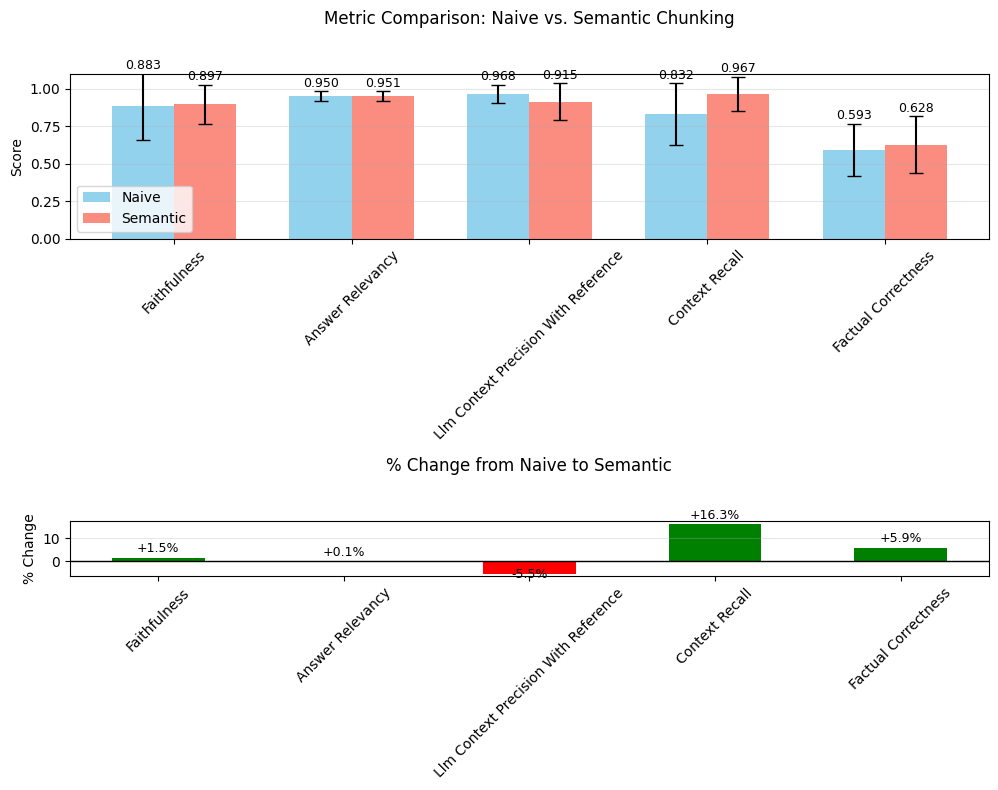

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert to DataFrames
df_naive = result_naive.to_pandas()
df_semantic = result_semantic.to_pandas()

# Compute means and standard deviations
naive_means = df_naive.mean(numeric_only=True)
naive_stds = df_naive.std(numeric_only=True)

semantic_means = df_semantic.mean(numeric_only=True)
semantic_stds = df_semantic.std(numeric_only=True)

# Extract metrics and values
metrics = list(naive_means.keys())
naive_scores = [naive_means[m] for m in metrics]
semantic_scores = [semantic_means[m] for m in metrics]
naive_err = [naive_stds[m] for m in metrics]
semantic_err = [semantic_stds[m] for m in metrics]
percent_change = [((s - n) / n) * 100 for s, n in zip(semantic_scores, naive_scores)]

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

x = np.arange(len(metrics))
width = 0.35

# Bar chart with error bars
bars1 = ax1.bar(x - width/2, naive_scores, width, yerr=naive_err, capsize=5, label='Naive', color='skyblue', alpha=0.9)
bars2 = ax1.bar(x + width/2, semantic_scores, width, yerr=semantic_err, capsize=5, label='Semantic', color='salmon', alpha=0.9)

ax1.set_ylabel('Score')
ax1.set_title('Metric Comparison: Naive vs. Semantic Chunking\n\n')
ax1.set_xticks(x)
ax1.set_xticklabels([m.replace('_', ' ').title() for m in metrics], rotation=45)
ax1.legend()
ax1.set_ylim(0, 1.1)
ax1.grid(True, axis='y', alpha=0.3)

# Add value labels above bars
for i in range(len(metrics)):
    ax1.text(x[i] - width/2, naive_scores[i] + naive_err[i] + 0.01, f'{naive_scores[i]:.3f}', ha='center', va='bottom', fontsize=9)
    ax1.text(x[i] + width/2, semantic_scores[i] + semantic_err[i] + 0.01, f'{semantic_scores[i]:.3f}', ha='center', va='bottom', fontsize=9)

# % change bar chart
colors = ['green' if p >= 0 else 'red' for p in percent_change]
ax2.bar(x, percent_change, width=0.5, color=colors)
ax2.axhline(0, color='black', linewidth=1)
ax2.set_ylabel('% Change')
ax2.set_xticks(x)
ax2.set_xticklabels([m.replace('_', ' ').title() for m in metrics], rotation=45)
ax2.set_title('% Change from Naive to Semantic\n\n')
ax2.grid(True, axis='y', alpha=0.3)

# Add % labels
for i, pct in enumerate(percent_change):
    ax2.text(x[i], pct + (1 if pct >= 0 else -3), f'{pct:+.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
